In [1]:
import pandas as pd                                                  # see below for install instruction
import matplotlib.pyplot as plt                                # plotting
import numpy as np                                             # dense matrices
from scipy.sparse import csr_matrix                            # sparse matrices
from sklearn.preprocessing import normalize                    # normalizing vectors
from sklearn.metrics import pairwise_distances                 # pairwise distances
import sys      
import os
import json
%matplotlib inline

In [2]:
def load_sparse_csr(filename):
    loader = np.load(filename)
    data = loader['data']
    indices = loader['indices']
    indptr = loader['indptr']
    shape = loader['shape']
    return csr_matrix( (data, indices, indptr), shape)



In [29]:
wiki = sframe.SFrame('people_wiki.gl/')
#tf_idf = load_sparse_csr('people_wiki_tf_idf.npz')

In [24]:
import sframe
map_index_to_word = sframe.SFrame('people_wiki_map_index_to_word.gl/')


[INFO] sframe.cython.cy_server: SFrame v2.1 started. Logging /tmp/sframe_server_1502305287.log


In [25]:
map_index_to_word

feature,category,index
feature,bioarchaeologist,0
feature,leaguehockey,1
feature,electionruss,2
feature,teramoto,3
feature,trumpeterpercussionist,4
feature,spoofax,5
feature,mendelssohni,6
feature,crosswise,7
feature,yec,8
feature,asianthemed,9


In [9]:
tf_idf[0]

<1x547979 sparse matrix of type '<type 'numpy.float64'>'
	with 139 stored elements in Compressed Sparse Row format>

In [8]:
tf_idf = normalize(tf_idf)

In [9]:
tf_idf

<59071x547979 sparse matrix of type '<type 'numpy.float64'>'
	with 10379283 stored elements in Compressed Sparse Row format>

In [10]:
def get_initial_centroids(data, k, seed=None):
    '''Randomly choose k data points as initial centroids'''
    if seed is not None: # useful for obtaining consistent results
        np.random.seed(seed)
    n = data.shape[0] # number of data points
        
    # Pick K indices from range [0, N).
    rand_indices = np.random.randint(0, n, k)
    
    # Keep centroids as dense format, as many entries will be nonzero due to averaging.
    # As long as at least one document in a cluster contains a word,
    # it will carry a nonzero weight in the TF-IDF vector of the centroid.
    centroids = data[rand_indices,:].toarray()
    
    return centroids

In [21]:
# Get the TF-IDF vectors for documents 100 through 102.
queries = tf_idf[:3,:]

# Compute pairwise distances from every data point to each query vector.
distance = pairwise_distances(tf_idf, queries, metric='euclidean')
print distance

[[ 0.          1.40775177  1.38784582]
 [ 1.40775177  0.          1.39867641]
 [ 1.38784582  1.39867641  0.        ]
 ..., 
 [ 1.37070999  1.40978937  1.40616385]
 [ 1.35214578  1.41306211  1.40869799]
 [ 1.40799024  1.41353429  1.40903605]]


In [19]:
if np.allclose(dist, pairwise_distances(tf_idf[430,:], tf_idf[1,:])):
    print('Pass')
else:
    print('Check your code again')

Pass


In [27]:
closest_cluster = [np.argmin(x) for x in distance]
print closest_cluster

[0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 0, 2, 0, 1, 0, 2, 2, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 1, 2, 0, 2, 1, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2, 1, 0, 1, 1, 0, 2, 2, 1, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 1, 2, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 

In [29]:
reference = [list(row).index(min(row)) for row in distance]
if np.allclose(closest_cluster, reference):
    print('Pass')
else:
    print('Check your code again')

Pass


In [11]:
cluster_assignment = closest_cluster
if len(cluster_assignment)==59071 and \
   np.array_equal(np.bincount(cluster_assignment), np.array([23061, 10086, 25924])):
    print('Pass') # count number of data points for each cluster
else:
    print('Check your code again.')

NameError: name 'closest_cluster' is not defined

In [12]:
def assign_clusters(data, centroids):
    
    # Compute distances between each data point and the set of centroids:
    # Fill in the blank (RHS only)
    distances_from_centroids = pairwise_distances(data, centroids, metric='euclidean')
    
    # Compute cluster assignments for each data point:
    # Fill in the blank (RHS only)
    cluster_assignment = np.array([np.argmin(x) for x in distances_from_centroids])
    
    return cluster_assignment

In [32]:
if np.allclose(assign_clusters(tf_idf[0:100:10], tf_idf[0:8:2]), np.array([0, 1, 1, 0, 0, 2, 0, 2, 2, 1])):
    print('Pass')
else:
    print('Check your code again.')

Pass


In [33]:
data = np.array([[1., 2., 0.],
                 [0., 0., 0.],
                 [2., 2., 0.]])
centroids = np.array([[0.5, 0.5, 0.],
                      [0., -0.5, 0.]])

In [34]:
cluster_assignment = assign_clusters(data, centroids)
print cluster_assignment   # prints [0 1 0]

[0, 1, 0]


In [49]:
print data[cluster_assignment==1]

[ 1.  2.  0.]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: using a boolean instead of an integer will result in an error in the future
  """Entry point for launching an IPython kernel.


In [50]:
print data[cluster_assignment==0].mean(axis=0)

1.0


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: using a boolean instead of an integer will result in an error in the future
  """Entry point for launching an IPython kernel.


In [13]:
def revise_centroids(data, k, cluster_assignment):
    new_centroids = []
    for i in xrange(k):
        # Select all data points that belong to cluster i. Fill in the blank (RHS only)
        member_data_points = data[cluster_assignment == i]
        # Compute the mean of the data points. Fill in the blank (RHS only)
        centroid = member_data_points.mean(axis = 0)
        
        # Convert numpy.matrix type to numpy.ndarray type
        centroid = centroid.A1
        new_centroids.append(centroid)
    new_centroids = np.array(new_centroids)
    
    return new_centroids

In [62]:
result = revise_centroids(tf_idf[0:100:10], 3, np.array([0, 1, 1, 0, 0, 2, 0, 2, 2, 1]))
if np.allclose(result[0], np.mean(tf_idf[[0,30,40,60]].toarray(), axis=0)) and \
   np.allclose(result[1], np.mean(tf_idf[[10,20,90]].toarray(), axis=0))   and \
   np.allclose(result[2], np.mean(tf_idf[[50,70,80]].toarray(), axis=0)):
    print('Pass')
else:
    print('Check your code')

Pass


In [66]:
np.mean(tf_idf[[0,30,40,60]].toarray(), axis=0)

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         1.50008938e-04,   8.46265596e-05,   2.38278645e-05])

In [14]:
def compute_heterogeneity(data, k, centroids, cluster_assignment):
    
    heterogeneity = 0.0
    for i in xrange(k):
        
        # Select all data points that belong to cluster i. Fill in the blank (RHS only)
        member_data_points = data[cluster_assignment==i, :]
        
        if member_data_points.shape[0] > 0: # check if i-th cluster is non-empty
            # Compute distances from centroid to data points (RHS only)
            distances = pairwise_distances(member_data_points, [centroids[i]], metric='euclidean')
            squared_distances = distances**2
            heterogeneity += np.sum(squared_distances)
        
    return heterogeneity

In [15]:
# Fill in the blanks
def kmeans(data, k, initial_centroids, maxiter, record_heterogeneity=None, verbose=False):
    '''This function runs k-means on given data and initial set of centroids.
       maxiter: maximum number of iterations to run.
       record_heterogeneity: (optional) a list, to store the history of heterogeneity as function of iterations
                             if None, do not store the history.
       verbose: if True, print how many data points changed their cluster labels in each iteration'''
    centroids = initial_centroids[:]
    prev_cluster_assignment = None
    
    for itr in xrange(maxiter):        
        if verbose:
            print(itr)
        
        # 1. Make cluster assignments using nearest centroids
        # YOUR CODE HERE
        cluster_assignment = assign_clusters(data, centroids)
            
        # 2. Compute a new centroid for each of the k clusters, averaging all data points assigned to that cluster.
        # YOUR CODE HERE
        centroids = revise_centroids(data, k, cluster_assignment)
            
        # Check for convergence: if none of the assignments changed, stop
        if prev_cluster_assignment is not None and \
          (prev_cluster_assignment==cluster_assignment).all():
            break
        
        # Print number of new assignments 
        if prev_cluster_assignment is not None:
            num_changed = np.sum(prev_cluster_assignment!=cluster_assignment)
            if verbose:
                print('    {0:5d} elements changed their cluster assignment.'.format(num_changed))   
        
        # Record heterogeneity convergence metric
        if record_heterogeneity is not None:
            # YOUR CODE HERE
            score = compute_heterogeneity(data, k, centroids, cluster_assignment)
            record_heterogeneity.append(score)
        
        prev_cluster_assignment = cluster_assignment[:]
        
    return centroids, cluster_assignment

In [16]:
def plot_heterogeneity(heterogeneity, k):
    plt.figure(figsize=(7,4))
    plt.plot(heterogeneity, linewidth=4)
    plt.xlabel('# Iterations')
    plt.ylabel('Heterogeneity')
    plt.title('Heterogeneity of clustering over time, K={0:d}'.format(k))
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

0
1
    19157 elements changed their cluster assignment.
2
     7739 elements changed their cluster assignment.
3
     5119 elements changed their cluster assignment.
4
     3370 elements changed their cluster assignment.
5
     2811 elements changed their cluster assignment.
6
     3233 elements changed their cluster assignment.
7
     3815 elements changed their cluster assignment.
8
     3172 elements changed their cluster assignment.
9
     1149 elements changed their cluster assignment.
10
      498 elements changed their cluster assignment.
11
      265 elements changed their cluster assignment.
12
      149 elements changed their cluster assignment.
13
      100 elements changed their cluster assignment.
14
       76 elements changed their cluster assignment.
15
       67 elements changed their cluster assignment.
16
       51 elements changed their cluster assignment.
17
       47 elements changed their cluster assignment.
18
       40 elements changed their cluster assignment.

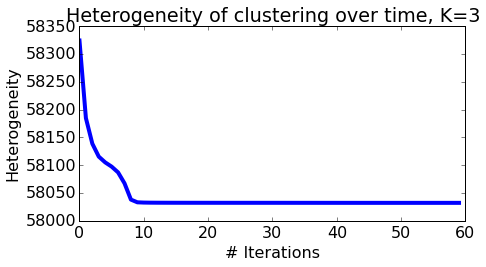

In [17]:
k = 3
heterogeneity = []
initial_centroids = get_initial_centroids(tf_idf, k, seed=0)
centroids, cluster_assignment = kmeans(tf_idf, k, initial_centroids, maxiter=400,
                                       record_heterogeneity=heterogeneity, verbose=True)
plot_heterogeneity(heterogeneity, k)

In [18]:
np.bincount(cluster_assignment)

array([19595, 10427, 29049])

In [40]:
k = 10
heterogeneity = {}
import time
start = time.time()
for seed in [0, 20000, 40000, 60000, 80000, 100000, 120000]:
    initial_centroids = get_initial_centroids(tf_idf, k, seed)
    centroids, cluster_assignment = kmeans(tf_idf, k, initial_centroids, maxiter=400,
                                           record_heterogeneity=None, verbose=False)
    # To save time, compute heterogeneity only once in the end
    print np.bincount(cluster_assignment)
    heterogeneity[seed] = compute_heterogeneity(tf_idf, k, centroids, cluster_assignment)
    print('seed={0:06d}, heterogeneity={1:.5f}'.format(seed, heterogeneity[seed]))
    sys.stdout.flush()
end = time.time()
print(end-start)

[18047  3824  5671  6983  1492  1730  3882  3449  7139  6854]
seed=000000, heterogeneity=57457.52442
[ 3142   768  3566  2277 15779  7278  6146  7964  6666  5485]
seed=020000, heterogeneity=57533.20100
[ 5551  6623   186  2999  8487  3893  6807  2921  3472 18132]
seed=040000, heterogeneity=57512.69257
[ 3014  3089  6681  3856  8080  7222  3424   424  5381 17900]
seed=060000, heterogeneity=57466.97925
[17582  1785  7215  3314  6285   809  5930  6791  5536  3824]
seed=080000, heterogeneity=57494.92990
[ 6618  1337  6191  2890 16969  4983  5242  3892  5562  5387]
seed=100000, heterogeneity=57484.42210
[ 6118  5841  4964  8423  4302  3183 16481  1608  5524  2627]
seed=120000, heterogeneity=57554.62410
473.302634001


In [20]:
def smart_initialize(data, k, seed=None):
    '''Use k-means++ to initialize a good set of centroids'''
    if seed is not None: # useful for obtaining consistent results
        np.random.seed(seed)
    centroids = np.zeros((k, data.shape[1]))
    
    # Randomly choose the first centroid.
    # Since we have no prior knowledge, choose uniformly at random
    idx = np.random.randint(data.shape[0])
    centroids[0] = data[idx,:].toarray()
    # Compute distances from the first centroid chosen to all the other data points
    squared_distances = pairwise_distances(data, centroids[0:1], metric='euclidean').flatten()**2
    
    for i in xrange(1, k):
        # Choose the next centroid randomly, so that the probability for each data point to be chosen
        # is directly proportional to its squared distance from the nearest centroid.
        # Roughtly speaking, a new centroid should be as far as from ohter centroids as possible.
        idx = np.random.choice(data.shape[0], 1, p=squared_distances/sum(squared_distances))
        centroids[i] = data[idx,:].toarray()
        # Now compute distances from the centroids to all data points
        squared_distances = np.min(pairwise_distances(data, centroids[0:i+1], metric='euclidean')**2,axis=1)
    
    return centroids

In [39]:
k = 10
heterogeneity_smart = {}
start = time.time()
for seed in [0, 20000, 40000, 60000, 80000, 100000, 120000]:
    initial_centroids = smart_initialize(tf_idf, k, seed)
    centroids, cluster_assignment = kmeans(tf_idf, k, initial_centroids, maxiter=400,
                                           record_heterogeneity=None, verbose=False)
    # To save time, compute heterogeneity only once in the end
    heterogeneity_smart[seed] = compute_heterogeneity(tf_idf, k, centroids, cluster_assignment)
    print np.bincount(cluster_assignment)
    print('seed={0:06d}, heterogeneity={1:.5f}'.format(seed, heterogeneity_smart[seed]))
    sys.stdout.flush()
end = time.time()
print(end-start)

[19618  3857  4173  5219  1743  6900  5530  1348  4384  6299]
seed=000000, heterogeneity=57468.63808
[ 7132  1726  7419 20581  1941  5121  3777  3741   776  6857]
seed=020000, heterogeneity=57486.94263
[17602  3415  3535  1736  6445  2552  7106  7155   599  8926]
seed=040000, heterogeneity=57454.35926
[ 2655  9080  8047  2751 16942  1163  2810  6788  3389  5446]
seed=060000, heterogeneity=57530.43659
[ 6222  2024  6461  6765  5538 18352  3936  1563  1751  6459]
seed=080000, heterogeneity=57454.51852
[ 6459  5477  5746 17792  3436  1346  1743  3792  8075  5205]
seed=100000, heterogeneity=57471.56674
[ 3791  5186  1349 16549  7119  2625  8441  1131  6223  6657]
seed=120000, heterogeneity=57523.28839
570.589978933


In [22]:
def kmeans_multiple_runs(data, k, maxiter, num_runs, seed_list=None, verbose=False):
    heterogeneity = {}
    
    min_heterogeneity_achieved = float('inf')
    best_seed = None
    final_centroids = None
    final_cluster_assignment = None
    
    for i in xrange(num_runs):
        
        # Use UTC time if no seeds are provided 
        if seed_list is not None: 
            seed = seed_list[i]
            np.random.seed(seed)
        else: 
            seed = int(time.time())
            np.random.seed(seed)
        
        # Use k-means++ initialization
        # YOUR CODE HERE
        initial_centroids = smart_initialize(data, k, seed)
        
        # Run k-means
        # YOUR CODE HERE
        centroids, cluster_assignment = kmeans(data, k, initial_centroids, maxiter, record_heterogeneity=None, verbose=False)
        
        # To save time, compute heterogeneity only once in the end
        # YOUR CODE HERE
        heterogeneity[seed] = compute_heterogeneity(data, k, centroids, cluster_assignment)
        
        if verbose:
            print('seed={0:06d}, heterogeneity={1:.5f}'.format(seed, heterogeneity[seed]))
            sys.stdout.flush()
        
        # if current measurement of heterogeneity is lower than previously seen,
        # update the minimum record of heterogeneity.
        if heterogeneity[seed] < min_heterogeneity_achieved:
            min_heterogeneity_achieved = heterogeneity[seed]
            best_seed = seed
            final_centroids = centroids
            final_cluster_assignment = cluster_assignment
    
    # Return the centroids and cluster assignments that minimize heterogeneity.
    return final_centroids, final_cluster_assignment

2
10
25
50
100


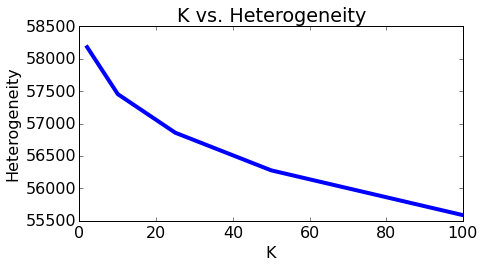

In [26]:
def plot_k_vs_heterogeneity(k_values, heterogeneity_values):
    plt.figure(figsize=(7,4))
    plt.plot(k_values, heterogeneity_values, linewidth=4)
    plt.xlabel('K')
    plt.ylabel('Heterogeneity')
    plt.title('K vs. Heterogeneity')
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

filename = 'kmeans-arrays.npz'

heterogeneity_values = []
k_list = [2, 10, 25, 50, 100]

if os.path.exists(filename):
    arrays = np.load(filename)
    centroids = {}
    cluster_assignment = {}
    for k in k_list:
        print k
        sys.stdout.flush()
        centroids[k] = arrays['centroids_{0:d}'.format(k)]
        cluster_assignment[k] = arrays['cluster_assignment_{0:d}'.format(k)]
        score = compute_heterogeneity(tf_idf, k, centroids[k], cluster_assignment[k])
        heterogeneity_values.append(score)
    
    plot_k_vs_heterogeneity(k_list, heterogeneity_values)

else:
    print('File not found. Skipping.')

In [30]:
def visualize_document_clusters(wiki, tf_idf, centroids, cluster_assignment, k, map_index_to_word, display_content=True):
    '''wiki: original dataframe
       tf_idf: data matrix, sparse matrix format
       map_index_to_word: SFrame specifying the mapping betweeen words and column indices
       display_content: if True, display 8 nearest neighbors of each centroid'''
    
    print('==========================================================')

    # Visualize each cluster c
    for c in xrange(k):
        # Cluster heading
        print('Cluster {0:d}    '.format(c)),
        # Print top 5 words with largest TF-IDF weights in the cluster
        idx = centroids[c].argsort()[::-1]
        for i in xrange(5): # Print each word along with the TF-IDF weight
            print('{0:s}:{1:.3f}'.format(map_index_to_word['category'][idx[i]], centroids[c,idx[i]])),
        print('')
        
        if display_content:
            # Compute distances from the centroid to all data points in the cluster,
            # and compute nearest neighbors of the centroids within the cluster.
            distances = pairwise_distances(tf_idf, [centroids[c]], metric='euclidean').flatten()
            distances[cluster_assignment!=c] = float('inf') # remove non-members from consideration
            nearest_neighbors = distances.argsort()
            # For 8 nearest neighbors, print the title as well as first 180 characters of text.
            # Wrap the text at 80-character mark.
            for i in xrange(8):
                text = ' '.join(wiki[nearest_neighbors[i]]['text'].split(None, 25)[0:25])
                print('\n* {0:50s} {1:.5f}\n  {2:s}\n  {3:s}'.format(wiki[nearest_neighbors[i]]['name'],
                    distances[nearest_neighbors[i]], text[:90], text[90:180] if len(text) > 90 else ''))
        print('==========================================================')

In [31]:
visualize_document_clusters(wiki, tf_idf, centroids[2], cluster_assignment[2], 2, map_index_to_word)

Cluster 0     she:0.025 her:0.017 music:0.012 he:0.011 university:0.011 

* Anita Kunz                                         0.97401
  anita e kunz oc born 1956 is a canadianborn artist and illustratorkunz has lived in london
   new york and toronto contributing to magazines and working

* Janet Jackson                                      0.97472
  janet damita jo jackson born may 16 1966 is an american singer songwriter and actress know
  n for a series of sonically innovative socially conscious and

* Madonna (entertainer)                              0.97475
  madonna louise ciccone tkoni born august 16 1958 is an american singer songwriter actress 
  and businesswoman she achieved popularity by pushing the boundaries of lyrical

* %C3%81ine Hyland                                   0.97536
  ine hyland ne donlon is emeritus professor of education and former vicepresident of univer
  sity college cork ireland she was born in 1942 in athboy co

* Jane Fonda                         

In [32]:
k = 10
visualize_document_clusters(wiki, tf_idf, centroids[k], cluster_assignment[k], k, map_index_to_word)

Cluster 0     film:0.020 art:0.014 he:0.011 book:0.010 television:0.010 

* Wilson McLean                                      0.97479
  wilson mclean born 1937 is a scottish illustrator and artist he has illustrated primarily 
  in the field of advertising but has also provided cover art

* Anton Hecht                                        0.97748
  anton hecht is an english artist born in london in 2007 he asked musicians from around the
   durham area to contribute to a soundtrack for

* David Salle                                        0.97800
  david salle born 1952 is an american painter printmaker and stage designer who helped defi
  ne postmodern sensibility salle was born in norman oklahoma he earned

* Vipin Sharma                                       0.97805
  vipin sharma is an indian actor born in new delhi he is a graduate of national school of d
  rama new delhi india and the canadian

* Paul Swadel                                        0.97823
  paul swadel is a new


* Stephen Park Turner                                0.96405
  stephen turner is a researcher in social practice social and political theory and the phil
  osophy of the social sciences he is graduate research professor in

* Robert Bates (political scientist)                 0.96489
  robert hinrichs bates born 1942 is an american political scientist he is eaton professor o
  f the science of government in the departments of government and

* Georg von Krogh                                    0.96505
  georg von krogh was born in oslo norway he is a professor at eth zurich and holds the chai
  r of strategic management and innovation he
Cluster 5     football:0.076 coach:0.060 basketball:0.056 season:0.044 played:0.037 

* Todd Curley                                        0.92731
  todd curley born 14 january 1973 is a former australian rules footballer who played for co
  llingwood and the western bulldogs in the australian football league

* Ashley Prescott                        

Cluster 9     party:0.028 election:0.025 minister:0.025 served:0.021 law:0.019 

* Doug Lewis                                         0.96516
  douglas grinslade doug lewis pc qc born april 17 1938 is a former canadian politician a ch
  artered accountant and lawyer by training lewis entered the

* David Anderson (British Columbia politician)       0.96530
  david a anderson pc oc born august 16 1937 in victoria british columbia is a former canadi
  an cabinet minister educated at victoria college in victoria

* Lucienne Robillard                                 0.96679
  lucienne robillard pc born june 16 1945 is a canadian politician and a member of the liber
  al party of canada she sat in the house

* Bob Menendez                                       0.96686
  robert bob menendez born january 1 1954 is the senior united states senator from new jerse
  y he is a member of the democratic party first

* Mal Sandon                                         0.96706
  malcolm john mal san

In [33]:
np.bincount(cluster_assignment[10])

array([17602,  3415,  3535,  1736,  6445,  2552,  7106,  7155,   599,  8926])

In [34]:
visualize_document_clusters(wiki, tf_idf, centroids[25], cluster_assignment[25], 25,
                            map_index_to_word, display_content=False) # turn off

Cluster 0     law:0.077 district:0.048 court:0.046 republican:0.038 senate:0.038 
Cluster 1     research:0.054 professor:0.033 science:0.032 university:0.031 physics:0.029 
Cluster 2     hockey:0.216 nhl:0.134 ice:0.065 season:0.052 league:0.047 
Cluster 3     party:0.065 election:0.042 elected:0.031 parliament:0.027 member:0.023 
Cluster 4     board:0.025 president:0.023 chairman:0.022 business:0.022 executive:0.020 
Cluster 5     minister:0.160 prime:0.056 cabinet:0.044 party:0.043 election:0.042 
Cluster 6     university:0.044 professor:0.037 studies:0.035 history:0.034 philosophy:0.031 
Cluster 7     election:0.066 manitoba:0.058 liberal:0.051 party:0.045 riding:0.043 
Cluster 8     racing:0.095 formula:0.056 championship:0.054 race:0.052 poker:0.051 
Cluster 9     economics:0.146 economic:0.096 economist:0.053 policy:0.048 research:0.043 
Cluster 10     championships:0.075 olympics:0.050 marathon:0.048 metres:0.048 she:0.048 
Cluster 11     she:0.144 her:0.092 miss:0.016 actress:0

In [35]:
k=100
visualize_document_clusters(wiki, tf_idf, centroids[k], cluster_assignment[k], k,
                            map_index_to_word, display_content=False)
# turn off text for brevity -- turn it on if you are curious ;)

Cluster 0     brazilian:0.137 brazil:0.082 de:0.056 rio:0.053 paulo:0.050 
Cluster 1     bishop:0.170 diocese:0.085 archbishop:0.083 church:0.072 ordained:0.058 
Cluster 2     zealand:0.247 new:0.069 auckland:0.056 wellington:0.031 zealands:0.029 
Cluster 3     comics:0.181 comic:0.121 strip:0.042 graphic:0.036 book:0.034 
Cluster 4     puerto:0.309 rico:0.220 rican:0.066 juan:0.041 ricos:0.031 
Cluster 5     bbc:0.192 radio:0.127 presenter:0.054 show:0.046 news:0.042 
Cluster 6     senate:0.059 district:0.053 county:0.051 committee:0.049 state:0.044 
Cluster 7     labor:0.105 australian:0.099 liberal:0.071 election:0.067 seat:0.061 
Cluster 8     economics:0.065 university:0.048 research:0.045 professor:0.043 economic:0.043 
Cluster 9     foreign:0.086 ambassador:0.076 affairs:0.061 nations:0.053 united:0.040 
Cluster 10     she:0.188 her:0.052 women:0.026 womens:0.020 council:0.019 
Cluster 11     rowing:0.246 sculls:0.097 rower:0.081 olympics:0.073 championships:0.068 
Cluster 12   

Cluster 60     de:0.127 la:0.059 el:0.035 mexico:0.026 y:0.025 
Cluster 61     jewish:0.193 rabbi:0.132 israel:0.052 hebrew:0.038 jews:0.032 
Cluster 62     ballet:0.362 dance:0.109 dancer:0.084 she:0.057 danced:0.044 
Cluster 63     hockey:0.220 nhl:0.138 ice:0.067 season:0.053 league:0.048 
Cluster 64     law:0.148 court:0.093 judge:0.071 district:0.051 justice:0.043 
Cluster 65     coach:0.205 head:0.086 basketball:0.059 coaching:0.052 football:0.046 
Cluster 66     armenian:0.278 armenia:0.168 yerevan:0.100 sargsyan:0.055 genocide:0.031 
Cluster 67     album:0.088 released:0.044 music:0.040 records:0.033 albums:0.027 
Cluster 68     she:0.158 her:0.152 music:0.020 album:0.016 singer:0.013 
Cluster 69     theatre:0.194 directed:0.034 production:0.031 play:0.029 actor:0.027 
Cluster 70     health:0.099 medical:0.089 medicine:0.086 research:0.039 clinical:0.039 
Cluster 71     european:0.145 parliament:0.115 party:0.053 member:0.049 committee:0.048 
Cluster 72     marathon:0.459 half:

In [37]:
num_article = np.bincount(cluster_assignment[100])

In [41]:
len(num_article[num_article < 236])

29